# Cash Ratio Analysis Notebook

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## Read the Excel File into the Jupyter Notebook

### The excel file has the following variables:


|Variable Name|Variable Description|
|:---|:---|
|ID  |Firm Identification Code  |
|year  |Financial Year of Data  |
|TA  |Total Assets  |
|SALES_USD  |Net Sales in U.S. Dollars  |
|MKT_EQUITY  |Market Value of Common Equity  |
|ST_DEBT  |Short Term Debt  |
|LT_DEBT  |Long Term Debt  |
|NPPE  |Net Property, Plant and Equipment  |
|INTEREST  |Interest Expense  |
|EBIT  |Earnings Before Interest and Tax  |
|EBITDA  |Earnings Before Interest, Tax, Depreciation and Amortisation  |
|Cash  |Cash in Balance Sheet  |
|TA_USD  |Total Assets in U.S. Dollars  |
|NATION	  |Nation Code  |
|COUNTRY	  |Country Name  |

#### We read the file using read_excel()
The location of the file is: C:/Users/User/Desktop/

And the name of the file is: international_leverage.xlsx

In [2]:
df = pd.read_excel('international_leverage_2023.xlsx', sheet_name='Sheet1')

In [3]:
# Check the number of rows and columns
df.shape

(113285, 17)

In [4]:
df.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,-25.043,36,Australia
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,-93.479,36,Australia
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,-21.670,36,Australia
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,-6.018,36,Australia
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,-81.811,36,Australia


In [5]:
df

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,-25.043,36,Australia
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,-93.479,36,Australia
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,-21.670,36,Australia
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,-6.018,36,Australia
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,-81.811,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,43.146,81.338,73.019,422.452,31.817,826,UK
113281,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,39.090,77.160,76.756,396.238,29.130,826,UK
113282,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,39.085,78.674,78.314,393.939,29.522,826,UK
113283,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,48.820,89.331,95.152,362.910,35.754,826,UK


## Data Pre-processing

#### For our analysis, we will need the following variables.
#### So we drop rows with NaN values for: EBIT, MKT_EQUITY, BOOK_EQUITY,TA,SALES_USD,INTEREST.

#### We use the dropna method to delete the rows with missing values.

In [6]:
df1=df.dropna()

In [7]:
df1.shape

(95755, 17)

In [8]:
# We should use dropna() on a subset of columns which includes the variables we will use in our analysis.

In [9]:
df1=df.dropna(subset=['EBIT','EBITDA','MKT_EQUITY', 'BOOK_EQUITY','TA','TA_USD','NPPE','INTEREST','CASH'])

In [10]:
df1.shape

(96947, 17)

In [11]:
df2=df1.drop_duplicates()

In [12]:
# Check the number of rows and columns
# 6 rows were deleted.
df2.shape

(96947, 17)

In [13]:
# Change the name of the year variable from 'year' to 'Year'
df2=df2.rename(columns = {'year':'Year'})
df2

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,-25.043,36,Australia
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,-93.479,36,Australia
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,-21.670,36,Australia
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,-6.018,36,Australia
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,-81.811,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,43.146,81.338,73.019,422.452,31.817,826,UK
113281,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,39.090,77.160,76.756,396.238,29.130,826,UK
113282,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,39.085,78.674,78.314,393.939,29.522,826,UK
113283,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,48.820,89.331,95.152,362.910,35.754,826,UK


In [14]:
# Set display format option to show three digits after the decimal point 
pd.set_option('display.float_format', '{:.2f}'.format)

# Produce descriptive statistics (Transpose (the .T at the end) so the results are more readable)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,96947.00,2014.49,4.60,2007.00,2010.00,2015.00,2019.00,2022.00
TA,96947.00,163055.33,1250864.65,5.07,939.77,9049.64,44343.07,71461131.00
SALES_USD,96947.00,1731.15,9164.64,10.00,66.84,207.95,765.79,476914.94
MKT_EQUITY,96947.00,75136.90,455703.10,0.04,612.27,4208.74,20772.99,30622275.18
BOOK_EQUITY,96947.00,56079.54,344353.25,-552947.00,394.70,3911.00,20684.21,26245969.00
ST_DEBT,96054.00,19739.55,278141.34,0.00,7.55,370.82,3213.26,19748395.00
LT_DEBT,96482.00,31931.87,281304.45,-20398.00,4.92,312.00,3191.92,15308519.00
NPPE,96947.00,47294.90,322441.91,0.00,78.71,1625.31,11156.28,12775052.00
INTEREST,96947.00,721.39,9203.35,0.00,1.83,18.06,115.08,958000.00
EBIT,96947.00,7204.61,58343.36,-784440.00,8.67,327.11,2139.10,5977706.00


In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,96947.00,2014.49,4.60,2007.00,2010.00,2015.00,2019.00,2022.00
TA,96947.00,163055.33,1250864.65,5.07,939.77,9049.64,44343.07,71461131.00
SALES_USD,96947.00,1731.15,9164.64,10.00,66.84,207.95,765.79,476914.94
MKT_EQUITY,96947.00,75136.90,455703.10,0.04,612.27,4208.74,20772.99,30622275.18
BOOK_EQUITY,96947.00,56079.54,344353.25,-552947.00,394.70,3911.00,20684.21,26245969.00
ST_DEBT,96054.00,19739.55,278141.34,0.00,7.55,370.82,3213.26,19748395.00
LT_DEBT,96482.00,31931.87,281304.45,-20398.00,4.92,312.00,3191.92,15308519.00
NPPE,96947.00,47294.90,322441.91,0.00,78.71,1625.31,11156.28,12775052.00
INTEREST,96947.00,721.39,9203.35,0.00,1.83,18.06,115.08,958000.00
EBIT,96947.00,7204.61,58343.36,-784440.00,8.67,327.11,2139.10,5977706.00


In [16]:
# The table above shows the desriptive statistics for the "Raw" data.
# But we want the results for variables such as leverage ratio, Cash to asset ratio, Firm size (log of Sales) etc.
# So we have to create these variables from the "Raw" data.


## Create Key Variables

### We now need to create the variables we are interest in such as cash to asset ratio, profitability ratio (EBITDA to total assets) etc.

In [17]:
df2

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.98,35.00,33.99,40.02,0.60,66.56,78.92,7.84,-15.48,-12.60,17.49,95.22,-25.04,36,Australia
1,C036AAB00,2010,38.07,12.21,72.88,-25.37,0.62,59.03,7.55,4.73,-88.72,-86.61,17.18,31.99,-93.48,36,Australia
2,C036AAB00,2011,36.60,15.09,41.71,-35.72,14.91,50.22,6.66,5.29,-16.38,-15.82,15.94,39.23,-21.67,36,Australia
3,C036AAB00,2012,10.70,38.91,1.18,-24.37,0.08,31.21,0.68,3.24,-2.83,-2.44,2.04,10.96,-6.02,36,Australia
4,C036ABF00,2007,934.71,108.52,449.35,403.75,21.30,226.76,697.73,23.01,-89.59,-55.48,142.52,819.91,-81.81,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,C82699850,2013,255.16,461.95,852.48,148.53,0.00,0.00,19.10,0.00,43.15,81.34,73.02,422.45,31.82,826,UK
113281,C82699850,2014,254.38,428.37,912.27,151.50,0.00,0.00,20.40,0.00,39.09,77.16,76.76,396.24,29.13,826,UK
113282,C82699850,2015,267.09,435.81,766.49,153.45,0.00,0.00,23.20,0.00,39.09,78.67,78.31,393.94,29.52,826,UK
113283,C82699850,2016,294.32,409.29,883.21,165.08,0.00,0.00,20.57,0.00,48.82,89.33,95.15,362.91,35.75,826,UK


In [18]:
df2['CASH']

0         17.49
1         17.18
2         15.94
3          2.04
4        142.52
          ...  
113280    73.02
113281    76.76
113282    78.31
113283    95.15
113284    92.37
Name: CASH, Length: 96947, dtype: float64

In [19]:
df2['TA']

0        117.98
1         38.07
2         36.60
3         10.70
4        934.71
          ...  
113280   255.16
113281   254.38
113282   267.09
113283   294.32
113284   307.89
Name: TA, Length: 96947, dtype: float64

In [20]:
CR = df2['CASH']/df2['TA']

In [21]:
CR

0        0.15
1        0.45
2        0.44
3        0.19
4        0.15
         ... 
113280   0.29
113281   0.30
113282   0.29
113283   0.32
113284   0.30
Length: 96947, dtype: float64

In [34]:
df2

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.98,35.00,33.99,40.02,0.60,66.56,78.92,7.84,-15.48,-12.60,17.49,95.22,-25.04,36,Australia
1,C036AAB00,2010,38.07,12.21,72.88,-25.37,0.62,59.03,7.55,4.73,-88.72,-86.61,17.18,31.99,-93.48,36,Australia
2,C036AAB00,2011,36.60,15.09,41.71,-35.72,14.91,50.22,6.66,5.29,-16.38,-15.82,15.94,39.23,-21.67,36,Australia
3,C036AAB00,2012,10.70,38.91,1.18,-24.37,0.08,31.21,0.68,3.24,-2.83,-2.44,2.04,10.96,-6.02,36,Australia
4,C036ABF00,2007,934.71,108.52,449.35,403.75,21.30,226.76,697.73,23.01,-89.59,-55.48,142.52,819.91,-81.81,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,C82699850,2013,255.16,461.95,852.48,148.53,0.00,0.00,19.10,0.00,43.15,81.34,73.02,422.45,31.82,826,UK
113281,C82699850,2014,254.38,428.37,912.27,151.50,0.00,0.00,20.40,0.00,39.09,77.16,76.76,396.24,29.13,826,UK
113282,C82699850,2015,267.09,435.81,766.49,153.45,0.00,0.00,23.20,0.00,39.09,78.67,78.31,393.94,29.52,826,UK
113283,C82699850,2016,294.32,409.29,883.21,165.08,0.00,0.00,20.57,0.00,48.82,89.33,95.15,362.91,35.75,826,UK


In [36]:
# Create the key variables of interest
# We do not create leverage and Coverage variables here, but you can create it using the following formula:
#Leverage = df2((ST_DEBT + LT_DEBT) /TA)
#Coverage =  EBIT / INTEREST
# The coverage variable will generate infinity (inf) values when interest is zero.
# You should replace these 'inf' values with 'nan' as follows:
# df2['Coverage'] = df1['Coverage'].replace(np.inf, np.nan)
# Note: this assumes you have already created and added a variable called 'Coverage' to the dataframe df2):

# These are out X varibles or explnatory variables
df2['Tangibility']=df2['NPPE']/df2['TA']
df2['Market_to_book']= (df2['TA'] + df2['MKT_EQUITY'] - df2['BOOK_EQUITY']) /df2['TA']
#df2['Logsale'] = np.log(df2['TA'])
df2['Log_TA'] = np.log(df2['TA_USD'])
df2['Profitability']=df2['EBITDA']/df2['TA']

# We want to analyse cash to asset ratio (cash holding ratio)
df2['Cash_ratio'] = df2['CASH']/df2['TA']

In [37]:
df2

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,CASH,TA_USD,NET_INCOME,NATION,COUNTRY,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio
0,C036AAB00,2009,117.98,35.00,33.99,40.02,0.60,66.56,78.92,7.84,...,17.49,95.22,-25.04,36,Australia,0.67,0.95,4.56,-0.11,0.15
1,C036AAB00,2010,38.07,12.21,72.88,-25.37,0.62,59.03,7.55,4.73,...,17.18,31.99,-93.48,36,Australia,0.20,3.58,3.47,-2.27,0.45
2,C036AAB00,2011,36.60,15.09,41.71,-35.72,14.91,50.22,6.66,5.29,...,15.94,39.23,-21.67,36,Australia,0.18,3.12,3.67,-0.43,0.44
3,C036AAB00,2012,10.70,38.91,1.18,-24.37,0.08,31.21,0.68,3.24,...,2.04,10.96,-6.02,36,Australia,0.06,3.39,2.39,-0.23,0.19
4,C036ABF00,2007,934.71,108.52,449.35,403.75,21.30,226.76,697.73,23.01,...,142.52,819.91,-81.81,36,Australia,0.75,1.05,6.71,-0.06,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,C82699850,2013,255.16,461.95,852.48,148.53,0.00,0.00,19.10,0.00,...,73.02,422.45,31.82,826,UK,0.07,3.76,6.05,0.32,0.29
113281,C82699850,2014,254.38,428.37,912.27,151.50,0.00,0.00,20.40,0.00,...,76.76,396.24,29.13,826,UK,0.08,3.99,5.98,0.30,0.30
113282,C82699850,2015,267.09,435.81,766.49,153.45,0.00,0.00,23.20,0.00,...,78.31,393.94,29.52,826,UK,0.09,3.30,5.98,0.29,0.29
113283,C82699850,2016,294.32,409.29,883.21,165.08,0.00,0.00,20.57,0.00,...,95.15,362.91,35.75,826,UK,0.07,3.44,5.89,0.30,0.32


In [38]:
df2.shape

(96947, 22)

In [39]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,96947.00,2014.49,4.60,2007.00,2010.00,2015.00,2019.00,2022.00
TA,96947.00,163055.33,1250864.65,5.07,939.77,9049.64,44343.07,71461131.00
SALES_USD,96947.00,1731.15,9164.64,10.00,66.84,207.95,765.79,476914.94
MKT_EQUITY,96947.00,75136.90,455703.10,0.04,612.27,4208.74,20772.99,30622275.18
BOOK_EQUITY,96947.00,56079.54,344353.25,-552947.00,394.70,3911.00,20684.21,26245969.00
ST_DEBT,96054.00,19739.55,278141.34,0.00,7.55,370.82,3213.26,19748395.00
LT_DEBT,96482.00,31931.87,281304.45,-20398.00,4.92,312.00,3191.92,15308519.00
NPPE,96947.00,47294.90,322441.91,0.00,78.71,1625.31,11156.28,12775052.00
INTEREST,96947.00,721.39,9203.35,0.00,1.83,18.06,115.08,958000.00
EBIT,96947.00,7204.61,58343.36,-784440.00,8.67,327.11,2139.10,5977706.00


In [40]:
# We have too many variables
# We should keep only variables of interest
df3 = df2[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "Cash_ratio", "Year", "COUNTRY"]]

In [41]:
# The 'COUNTRY' Variable is not shown in the descrptive statistics because it is not a numerical variable
# But it is in the dataframe, and we can use it to select subsamples of particular countries
df3

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year,COUNTRY
0,0.67,0.95,4.56,-0.11,0.15,2009,Australia
1,0.20,3.58,3.47,-2.27,0.45,2010,Australia
2,0.18,3.12,3.67,-0.43,0.44,2011,Australia
3,0.06,3.39,2.39,-0.23,0.19,2012,Australia
4,0.75,1.05,6.71,-0.06,0.15,2007,Australia
...,...,...,...,...,...,...,...
113280,0.07,3.76,6.05,0.32,0.29,2013,UK
113281,0.08,3.99,5.98,0.30,0.30,2014,UK
113282,0.09,3.30,5.98,0.29,0.29,2015,UK
113283,0.07,3.44,5.89,0.30,0.32,2016,UK


### Select only the Australian observations

In [86]:
# bool = df3['COUNTRY'] == 'Australia'
# bool
# df_au = df3[bool]

df_au = df3[df3['COUNTRY'] == 'Australia']
df_au



,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year,COUNTRY
0,0.669,0.949,4.556,-0.107,0.148,2009,Australia
1,0.198,3.581,3.465,-2.275,0.451,2010,Australia
2,0.182,3.116,3.669,-0.432,0.436,2011,Australia
3,0.064,3.388,2.394,-0.228,0.190,2012,Australia
4,0.746,1.049,6.709,-0.059,0.152,2007,Australia
...,...,...,...,...,...,...,...
12088,0.516,1.377,10.364,0.264,0.016,2018,Australia
12089,0.525,1.735,10.304,0.189,0.018,2019,Australia
12090,0.553,1.513,10.329,0.200,0.015,2020,Australia
12091,0.558,1.710,10.369,0.180,0.041,2021,Australia


In [87]:
df_uk = df3[df3['COUNTRY'] == 'UK']
df_uk

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year,COUNTRY
94020,0.437,1.111,6.555,0.157,0.007,2007,UK
94021,0.332,0.664,6.192,0.083,0.008,2008,UK
94022,0.056,0.809,6.149,-0.017,0.015,2009,UK
94023,0.053,0.771,6.113,0.088,0.014,2010,UK
94024,0.055,0.915,6.093,0.075,0.015,2011,UK
...,...,...,...,...,...,...,...
113280,0.075,3.759,6.046,0.319,0.286,2013,UK
113281,0.080,3.991,5.982,0.303,0.302,2014,UK
113282,0.087,3.295,5.976,0.295,0.293,2015,UK
113283,0.070,3.440,5.894,0.304,0.323,2016,UK


In [88]:
df_au = df_au.dropna()
df_uk = df_uk.dropna()

In [89]:
df_au.shape

(10278, 7)

In [90]:
df_uk.shape

(14568, 7)

In [91]:
# Let's get the descriptive statistics for Australia

#df_au.describe().T

pd.set_option('display.float_format', '{:.3f}'.format)
df_au[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "Cash_ratio"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,10278.000,0.287,0.276,0.000,0.042,0.192,0.493,0.998
Market_to_book,10278.000,1.728,2.064,0.048,0.917,1.191,1.808,49.065
Log_TA,10278.000,5.452,1.819,2.306,4.017,5.210,6.638,11.885
Profitability,10278.000,0.075,0.384,-11.654,0.029,0.097,0.165,22.738
Cash_ratio,10278.000,0.146,0.164,0.000,0.037,0.087,0.191,0.999


In [92]:
# Let's get the descriptive statistics for UK

#df_uk.describe().T

pd.set_option('display.float_format', '{:.3f}'.format)
df_uk[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "Cash_ratio"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,14568.000,0.249,0.268,0.000,0.035,0.140,0.387,1.701
Market_to_book,14568.000,1.743,2.208,-0.055,0.970,1.284,1.910,91.201
Log_TA,14568.000,5.801,2.012,2.304,4.264,5.535,7.140,13.965
Profitability,14568.000,0.084,0.207,-4.643,0.039,0.094,0.154,8.758
Cash_ratio,14568.000,0.143,0.155,0.000,0.040,0.091,0.189,1.000


In [93]:
df_au.head()

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year,COUNTRY
0,0.669,0.949,4.556,-0.107,0.148,2009,Australia
1,0.198,3.581,3.465,-2.275,0.451,2010,Australia
2,0.182,3.116,3.669,-0.432,0.436,2011,Australia
3,0.064,3.388,2.394,-0.228,0.190,2012,Australia
4,0.746,1.049,6.709,-0.059,0.152,2007,Australia


In [94]:
df_uk.head()

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year,COUNTRY
94020,0.437,1.111,6.555,0.157,0.007,2007,UK
94021,0.332,0.664,6.192,0.083,0.008,2008,UK
94022,0.056,0.809,6.149,-0.017,0.015,2009,UK
94023,0.053,0.771,6.113,0.088,0.014,2010,UK
94024,0.055,0.915,6.093,0.075,0.015,2011,UK


In [47]:
# To remove outliers, we cap the variables at top and bottom 1%
# That means at 0.01 and 0.99 quantiles
df_au1=df_au.loc[:, df_au.columns != 'COUNTRY']
df_au1=df_au1.dropna()
df_au1 = df_au1.clip(lower=df_au1.quantile(0.01), upper=df_au1.quantile(0.99), axis=1)

df_au1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,10278.000,0.287,0.276,0.000,0.042,0.192,0.493,0.936
Market_to_book,10278.000,1.659,1.396,0.459,0.917,1.191,1.808,9.148
Log_TA,10278.000,5.446,1.799,2.475,4.017,5.210,6.638,9.974
Profitability,10278.000,0.079,0.187,-0.730,0.029,0.097,0.165,0.541
Cash_ratio,10278.000,0.145,0.160,0.001,0.037,0.087,0.191,0.767
Year,10278.000,2014.340,4.651,2007.000,2010.000,2014.000,2018.000,2022.000


In [95]:
# To remove outliers, we cap the variables at top and bottom 1%
# That means at 0.01 and 0.99 quantiles
df_uk1=df_uk.loc[:, df_au.columns != 'COUNTRY']
df_uk1=df_uk1.dropna()
df_uk1 = df_uk1.clip(lower=df_au1.quantile(0.01), upper=df_au1.quantile(0.99), axis=1)

df_uk1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,14568.000,0.249,0.267,0.000,0.035,0.140,0.387,0.936
Market_to_book,14568.000,1.684,1.260,0.459,0.970,1.284,1.910,9.144
Log_TA,14568.000,5.769,1.927,2.475,4.264,5.535,7.140,9.973
Profitability,14568.000,0.084,0.149,-0.729,0.039,0.094,0.154,0.541
Cash_ratio,14568.000,0.142,0.151,0.001,0.040,0.091,0.189,0.766
Year,14568.000,2013.775,4.536,2007.000,2010.000,2014.000,2018.000,2022.000


In [48]:
# This is the unclipped distribution
df_au.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
0.000,0.000,0.048,2.306,-11.654,0.000,2007.000
0.010,0.000,0.459,2.475,-0.730,0.001,2007.000
0.250,0.042,0.917,4.017,0.029,0.037,2010.000
0.500,0.192,1.191,5.210,0.097,0.087,2014.000
0.750,0.493,1.808,6.638,0.165,0.191,2018.000
0.990,0.936,9.148,9.974,0.541,0.767,2022.000
1.000,0.998,49.065,11.885,22.738,0.999,2022.000


In [96]:
# This is the unclipped distribution
df_uk.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
0.000,0.000,-0.055,2.304,-4.643,0.000,2007.000
0.010,0.000,0.504,2.473,-0.520,0.000,2007.000
0.250,0.035,0.970,4.264,0.039,0.040,2010.000
0.500,0.140,1.284,5.535,0.094,0.091,2014.000
0.750,0.387,1.910,7.140,0.154,0.189,2018.000
0.990,0.951,7.803,11.145,0.439,0.746,2022.000
1.000,1.701,91.201,13.965,8.758,1.000,2022.000


In [49]:
# This is the clipped distribution which has replaced the outliers
df_au1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
0.000,0.000,0.459,2.475,-0.730,0.001,2007.000
0.010,0.000,0.459,2.475,-0.729,0.001,2007.000
0.250,0.042,0.917,4.017,0.029,0.037,2010.000
0.500,0.192,1.191,5.210,0.097,0.087,2014.000
0.750,0.493,1.808,6.638,0.165,0.191,2018.000
0.990,0.936,9.144,9.973,0.541,0.766,2022.000
1.000,0.936,9.148,9.974,0.541,0.767,2022.000


In [97]:
# This is the clipped distribution which has replaced the outliers
df_uk1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
0.000,0.000,0.459,2.475,-0.729,0.001,2007.000
0.010,0.000,0.504,2.475,-0.520,0.001,2007.000
0.250,0.035,0.970,4.264,0.039,0.040,2010.000
0.500,0.140,1.284,5.535,0.094,0.091,2014.000
0.750,0.387,1.910,7.140,0.154,0.189,2018.000
0.990,0.936,7.803,9.973,0.439,0.746,2022.000
1.000,0.936,9.144,9.973,0.541,0.766,2022.000


In [50]:
df_au1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,10278.000,0.287,0.276,0.000,0.042,0.192,0.493,0.936
Market_to_book,10278.000,1.659,1.396,0.459,0.917,1.191,1.808,9.148
Log_TA,10278.000,5.446,1.799,2.475,4.017,5.210,6.638,9.974
Profitability,10278.000,0.079,0.187,-0.730,0.029,0.097,0.165,0.541
Cash_ratio,10278.000,0.145,0.160,0.001,0.037,0.087,0.191,0.767
Year,10278.000,2014.340,4.651,2007.000,2010.000,2014.000,2018.000,2022.000


In [98]:
df_uk1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,14568.000,0.249,0.267,0.000,0.035,0.140,0.387,0.936
Market_to_book,14568.000,1.684,1.260,0.459,0.970,1.284,1.910,9.144
Log_TA,14568.000,5.769,1.927,2.475,4.264,5.535,7.140,9.973
Profitability,14568.000,0.084,0.149,-0.729,0.039,0.094,0.154,0.541
Cash_ratio,14568.000,0.142,0.151,0.001,0.040,0.091,0.189,0.766
Year,14568.000,2013.775,4.536,2007.000,2010.000,2014.000,2018.000,2022.000


### Boxplot

#### The Boxplot shows the distribution of a variable.
You can learn more about Boxplot from the following websute:

https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/    

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


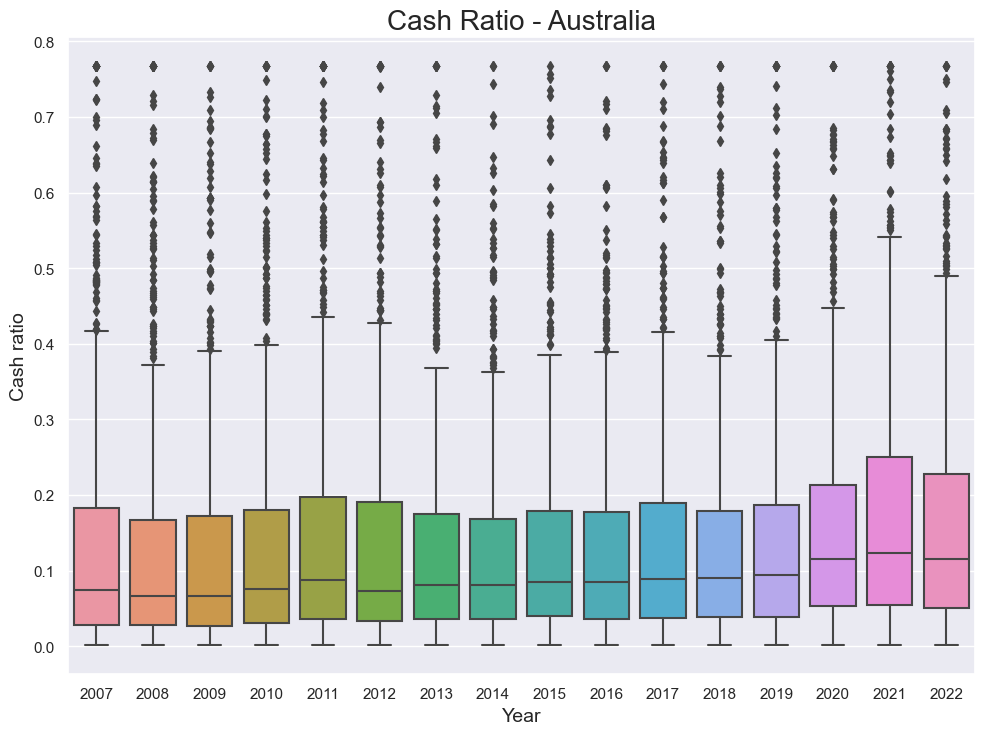

In [51]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot("Year","Cash_ratio",data=df_au1,ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Cash ratio', fontsize=14)
    ax.set_title('Cash Ratio - Australia', fontsize=20)

### Interpretations:


* The line in the middle of the boxes is the median of the 5oth percentile value of the variable (Cash_ratio).

* The box plot shows that the median cash holding ratio is less than 0.1 or 10% for all the years.

* The ratio has increased since 2012 and is close to 10% by 2017.

* The 75the percentile (75%) values (upper edge of the box) is less that 0.2 or 20% for all the years. 

* 2011 had the highest 75 percentile value for the cash ratio and it was then about 20%.

* The many dots on the top part of the graphs show that there are many large values or outliers in the Cash ratio.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


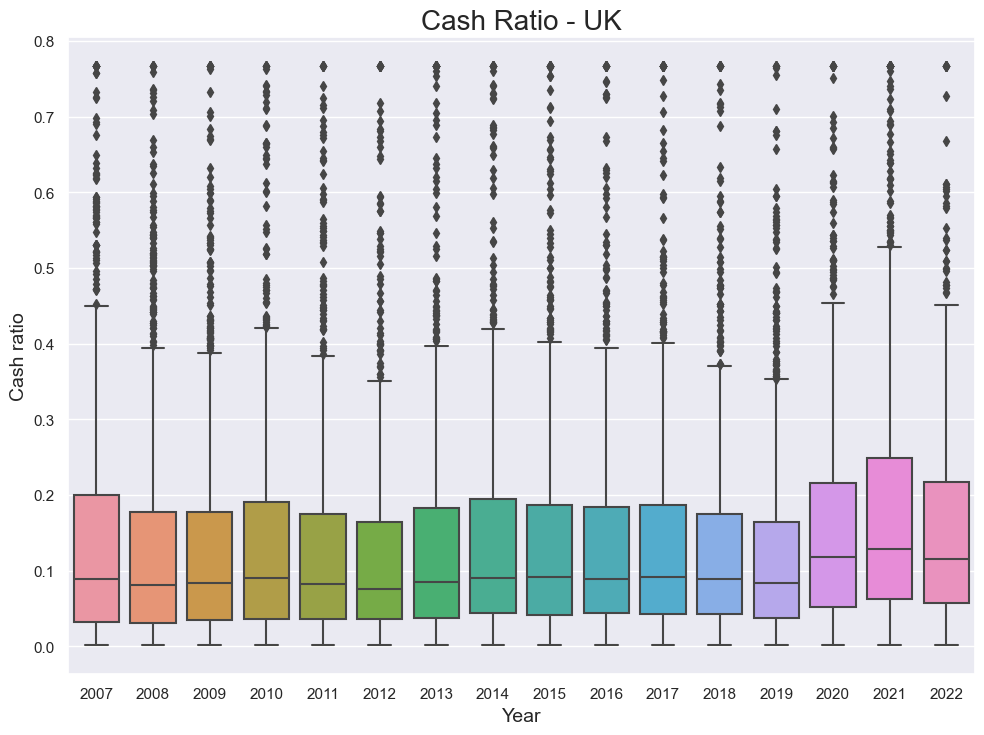

In [99]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot("Year","Cash_ratio",data=df_uk1,ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Cash ratio', fontsize=14)
    ax.set_title('Cash Ratio - UK', fontsize=20)

### Violinplot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


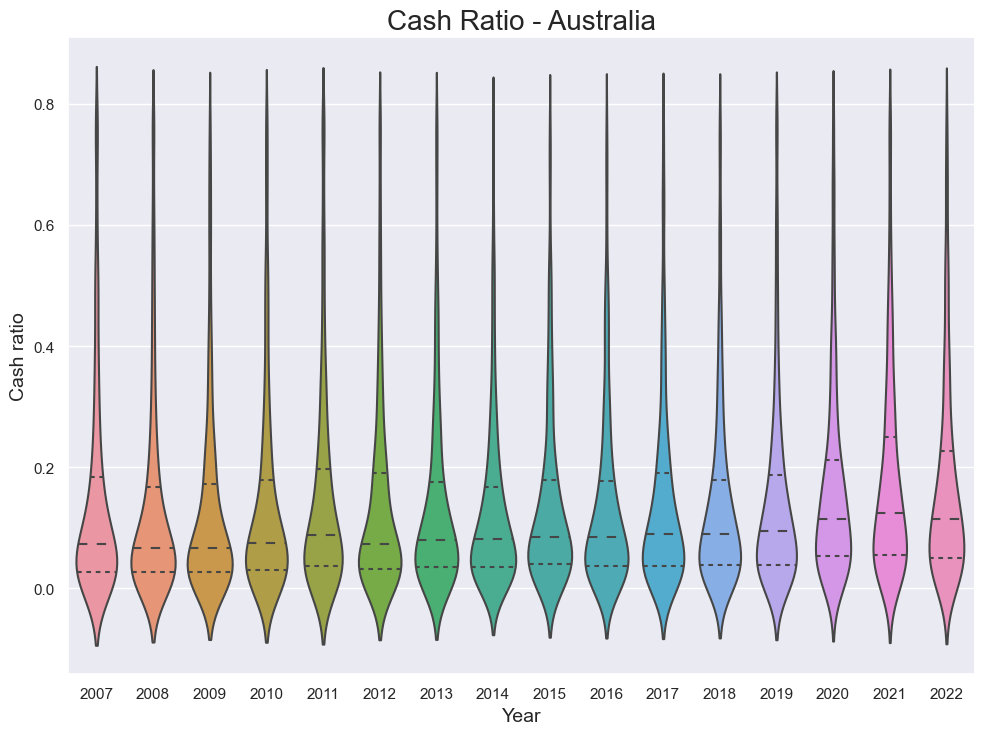

In [52]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot("Year","Cash_ratio",data=df_au1,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Cash ratio', fontsize=14)
    ax.set_title('Cash Ratio - Australia', fontsize=20)

## Calculate the Distribution of Cash Ratios over time

We use the quantile() method and mean() method to calculate the distribution of the cash ratio.

Here we use these methods on grouped data.

So we use the groupby operation first to group the data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


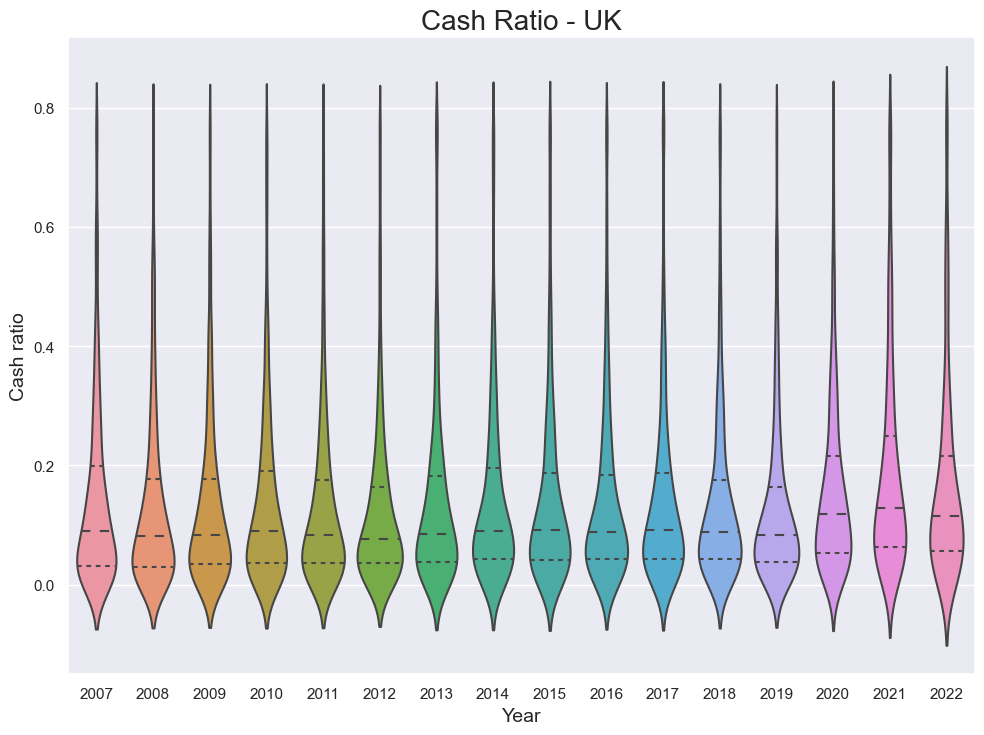

In [100]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot("Year","Cash_ratio",data=df_uk1,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Cash ratio', fontsize=14)
    ax.set_title('Cash Ratio - UK', fontsize=20)

In [105]:
g_df1 = df_au1[['Year', 'Cash_ratio']]

g_df1 = g_df1.groupby('Year')

quantiles = g_df1['Cash_ratio'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df1['Cash_ratio'].agg(['mean'])

data_combined=pd.concat([quantiles, mean], 1)
data_stacked_au=data_combined.stack().reset_index(name='Cash_ratio').rename(columns={'level_1': 'Quantiles and Mean'})

# Let's look at how 
data_stacked_au

C:\Users\HP\AppData\Local\Temp\ipykernel_18436\2603797947.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_combined=pd.concat([quantiles, mean], 1)


,Year,Quantiles and Mean,Cash_ratio
0,2007,0.100,0.011
1,2007,0.250,0.027
2,2007,0.500,0.074
3,2007,0.750,0.183
4,2007,0.900,0.402
...,...,...,...
91,2022,0.250,0.051
92,2022,0.500,0.115
93,2022,0.750,0.228
94,2022,0.900,0.411


In [106]:
g_df1 = df_uk1[['Year', 'Cash_ratio']]

g_df1 = g_df1.groupby('Year')

quantiles = g_df1['Cash_ratio'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df1['Cash_ratio'].agg(['mean'])

data_combined=pd.concat([quantiles, mean], 1)
data_stacked_uk=data_combined.stack().reset_index(name='Cash_ratio').rename(columns={'level_1': 'Quantiles and Mean'})

# Let's look at how 
data_stacked_uk

C:\Users\HP\AppData\Local\Temp\ipykernel_18436\3509911312.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data_combined=pd.concat([quantiles, mean], 1)


,Year,Quantiles and Mean,Cash_ratio
0,2007,0.100,0.009
1,2007,0.250,0.031
2,2007,0.500,0.089
3,2007,0.750,0.199
4,2007,0.900,0.360
...,...,...,...
91,2022,0.250,0.057
92,2022,0.500,0.115
93,2022,0.750,0.216
94,2022,0.900,0.405


## Plot the Distribution of Cash Ratios over time using Catplot

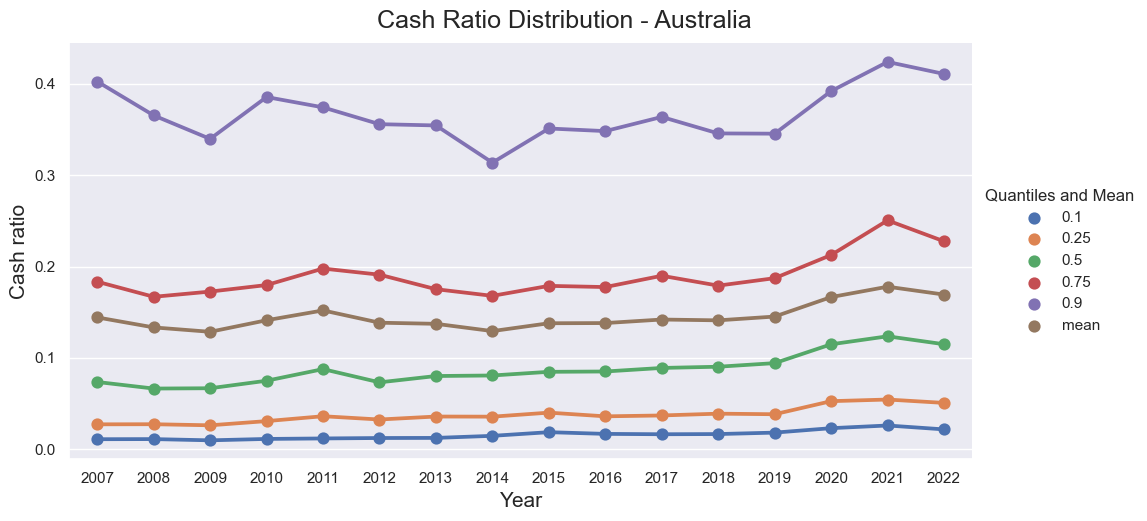

In [108]:
# Catplot
ax = sns.catplot(x="Year", y="Cash_ratio", hue="Quantiles and Mean", kind="point", data=data_stacked_au, 
        height=5, # make the plot 5 units high
        aspect=2); # height should be three times width

ax.fig.suptitle('Cash Ratio Distribution - Australia',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Cash ratio', fontsize=15);

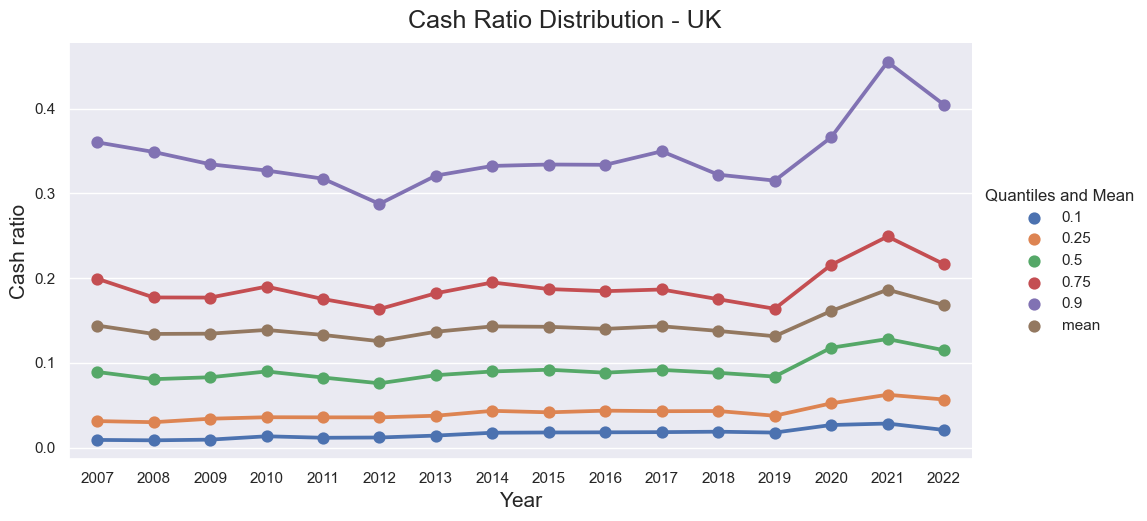

In [109]:
# Catplot
ax = sns.catplot(x="Year", y="Cash_ratio", hue="Quantiles and Mean", kind="point", data=data_stacked_uk, 
        height=5, # make the plot 5 units high
        aspect=2); # height should be three times width

ax.fig.suptitle('Cash Ratio Distribution - UK',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Cash ratio', fontsize=15);

## Using jointplot() to explore the relationship between firm characterstics and Cash ratio

### Explore the relation between Tangibility and Cash ratio

We do this analysis using only the 2020 data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


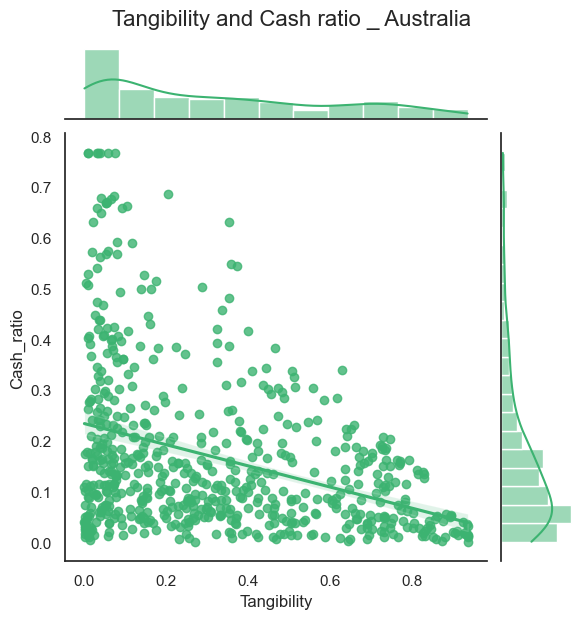

In [112]:
# Select the observations for 2020
df_au_2020 = df_au1[df_au1['Year'] == 2020]

# Plot using jointplot()
with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","Cash_ratio", data=df_au_2020, kind='reg',color='mediumseagreen')
    p.fig.suptitle("Tangibility and Cash ratio _ Australia",fontsize=16,y=1.03)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
   # plt.savefig('C:/Users/User/Desktop/jointplot_1.png')
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


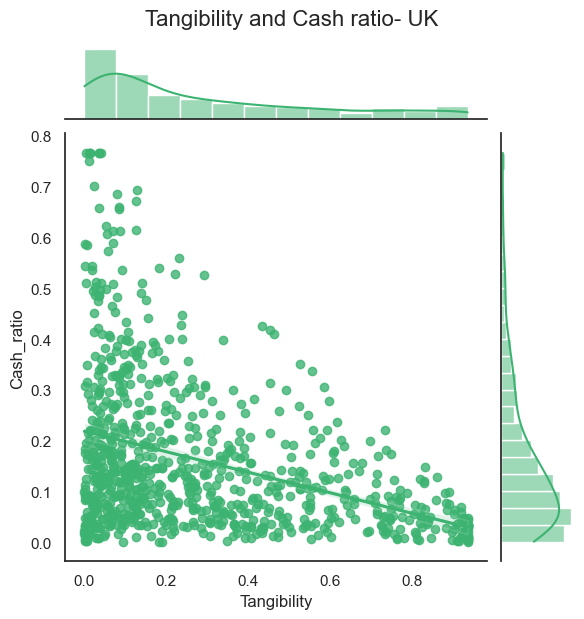

In [113]:
# Select the observations for 2020
df_uk_2020 = df_uk1[df_uk1['Year'] == 2020]

# Plot using jointplot()
with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","Cash_ratio", data=df_uk_2020, kind='reg',color='mediumseagreen')
    p.fig.suptitle("Tangibility and Cash ratio- UK",fontsize=16,y=1.03)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
   # plt.savefig('C:/Users/User/Desktop/jointplot_1.png')
    plt.show()

#### The scatter plot and the regression line above shows a negative relation between Asset Tangibilty and Cash Ratio

## We can do similar plots for the other firm characteristics

### Explore the relation between Market to book ratio and Cash ratio

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


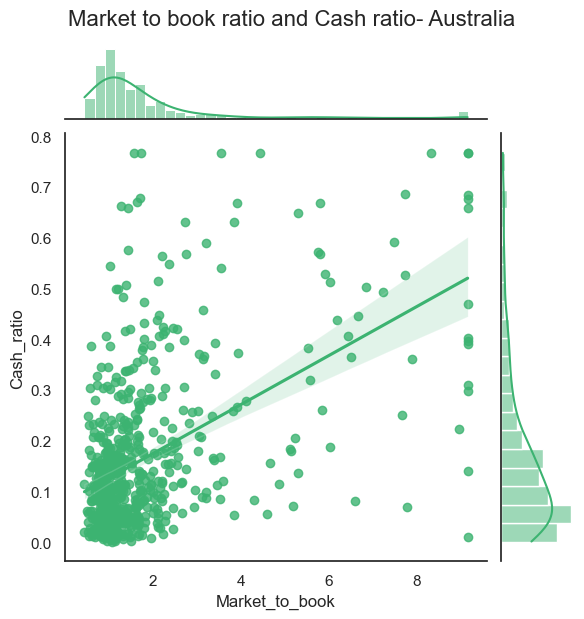

In [114]:
# Select the observations for 2020
df_au_2020 = df_au1[df_au1['Year'] == 2020]

with sns.axes_style('white'):
    p = sns.jointplot("Market_to_book","Cash_ratio", data=df_au_2020, kind='reg',color='mediumseagreen')
    p.fig.suptitle("Market to book ratio and Cash ratio- Australia",fontsize=16,y=1.03)
    
    plt.xlabel('Market to book ratio', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


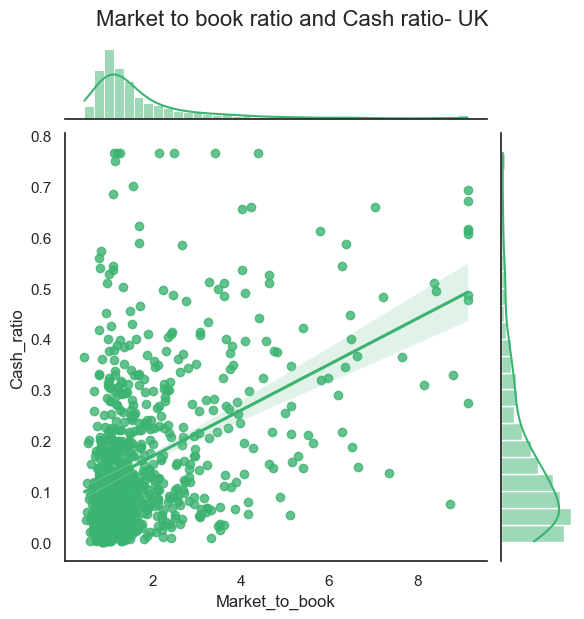

In [115]:
# Select the observations for 2020
df_uk_2020 = df_uk1[df_uk1['Year'] == 2020]

with sns.axes_style('white'):
    p = sns.jointplot("Market_to_book","Cash_ratio", data=df_uk_2020, kind='reg',color='mediumseagreen')
    p.fig.suptitle("Market to book ratio and Cash ratio- UK",fontsize=16,y=1.03)
    
    plt.xlabel('Market to book ratio', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
    plt.show()

### Explore the relation between Firm size (Log_TA) and Cash ratio

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


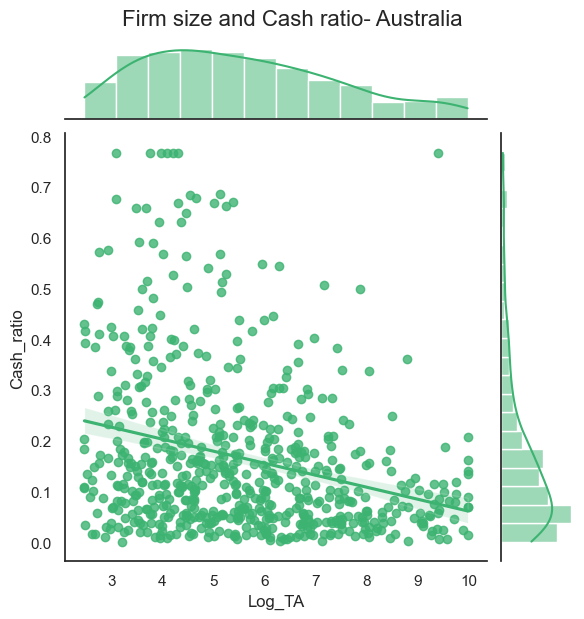

In [117]:
# Select the observations for 2020
df_au_2020 = df_au1[df_au1['Year'] == 2020]

with sns.axes_style('white'):
    p = sns.jointplot("Log_TA","Cash_ratio", data=df_au_2020, kind='reg',color='mediumseagreen')

    p.fig.suptitle("Firm size and Cash ratio- Australia",fontsize=16,y=1.03)
    
    plt.xlabel('Firm size (log of Total Assets)', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
    

    
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


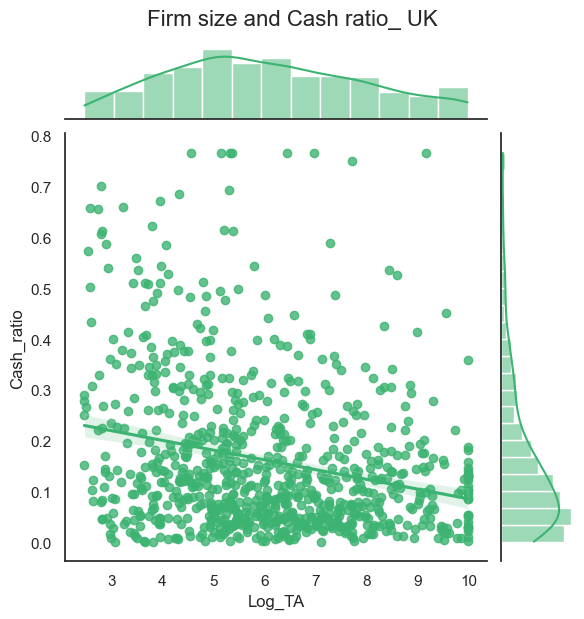

In [118]:
# Select the observations for 2020
df_uk_2020 = df_uk1[df_uk1['Year'] == 2020]

with sns.axes_style('white'):
    p = sns.jointplot("Log_TA","Cash_ratio", data=df_uk_2020, kind='reg',color='mediumseagreen')

    p.fig.suptitle("Firm size and Cash ratio_ UK",fontsize=16,y=1.03)
    
    plt.xlabel('Firm size (log of Total Assets)', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
    

    
    plt.show()

### Explore the relation between Profitability and Cash ratio

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


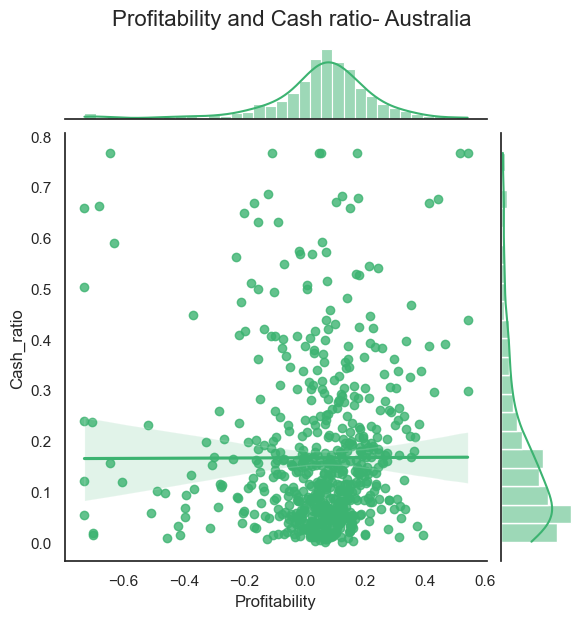

In [122]:
# Select the observations for 2020
df_au_2020 = df_au1[df_au1['Year'] == 2020]

with sns.axes_style('white'):
    p = sns.jointplot("Profitability","Cash_ratio", data=df_au_2020, kind='reg',color='mediumseagreen')
    p.fig.suptitle("Profitability and Cash ratio- Australia",fontsize=16,y=1.03)
    
    plt.xlabel('Profitability', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
    
 
    
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


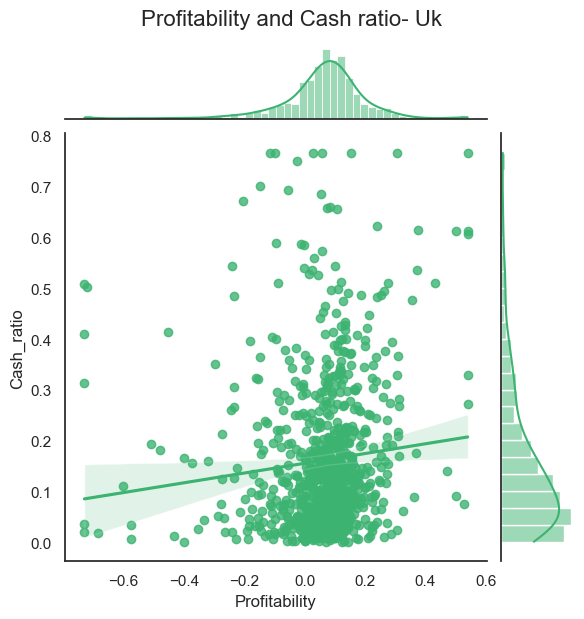

In [119]:
# Select the observations for 2020
df_uk_2020 = df_uk1[df_uk1['Year'] == 2020]

with sns.axes_style('white'):
    p = sns.jointplot("Profitability","Cash_ratio", data=df_uk_2020, kind='reg',color='mediumseagreen')
    p.fig.suptitle("Profitability and Cash ratio- Uk",fontsize=16,y=1.03)
    
    plt.xlabel('Profitability', fontsize=13)
    plt.ylabel('Cash ratio', fontsize=13)
    
 
    
    plt.show()

## Regression and Scatter Plot using LinearRegression

We can also get a scatter plot and regression line from LinearRegression from ScikitLearn library, which we covered in the machine learning lecture

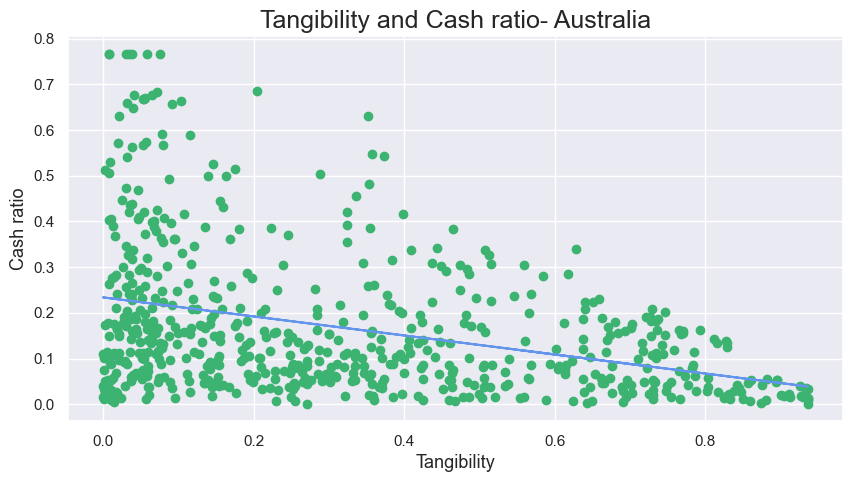

In [123]:
from sklearn.linear_model import LinearRegression

X = df_au_2020["Tangibility"].values.reshape(-1, 1)  # values converts it into a numpy array
y = df_au_2020["Cash_ratio"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,5))
plt.scatter(X, y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')

plt.title('Tangibility and Cash ratio- Australia', fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('Cash ratio', fontsize=13)
plt.show()

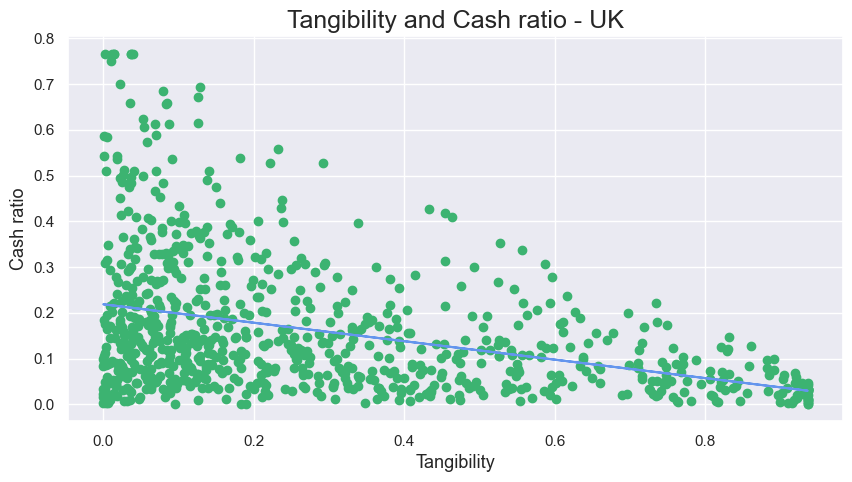

In [124]:
from sklearn.linear_model import LinearRegression

X = df_uk_2020["Tangibility"].values.reshape(-1, 1)  # values converts it into a numpy array
y = df_uk_2020["Cash_ratio"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.figure(figsize=(10,5))
plt.scatter(X, y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')

plt.title('Tangibility and Cash ratio - UK', fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('Cash ratio', fontsize=13)
plt.show()

## Correlation analysis and heatmap of the correlation matrix

*  We use the corr() method to calculate the correlation between the variables in our Australian sample.

In [63]:
CorrMatrix = df_au1.corr()
CorrMatrix

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
Tangibility,1.000,-0.152,0.221,0.002,-0.259,0.020
Market_to_book,-0.152,1.000,-0.115,0.230,0.365,0.085
Log_TA,0.221,-0.115,1.000,0.116,-0.256,0.017
Profitability,0.002,0.230,0.116,1.000,0.072,-0.059
Cash_ratio,-0.259,0.365,-0.256,0.072,1.000,0.057
Year,0.020,0.085,0.017,-0.059,0.057,1.000


*  We then use heatmap() from Seaborn to plot the correlation matrix.

In [125]:
CorrMatrix_uk = df_uk1.corr()
CorrMatrix_uk

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
Tangibility,1.000,-0.175,0.243,0.002,-0.292,0.030
Market_to_book,-0.175,1.000,-0.082,0.317,0.342,0.152
Log_TA,0.243,-0.082,1.000,0.123,-0.216,0.089
Profitability,0.002,0.317,0.123,1.000,0.040,0.013
Cash_ratio,-0.292,0.342,-0.216,0.040,1.000,0.053
Year,0.030,0.152,0.089,0.013,0.053,1.000


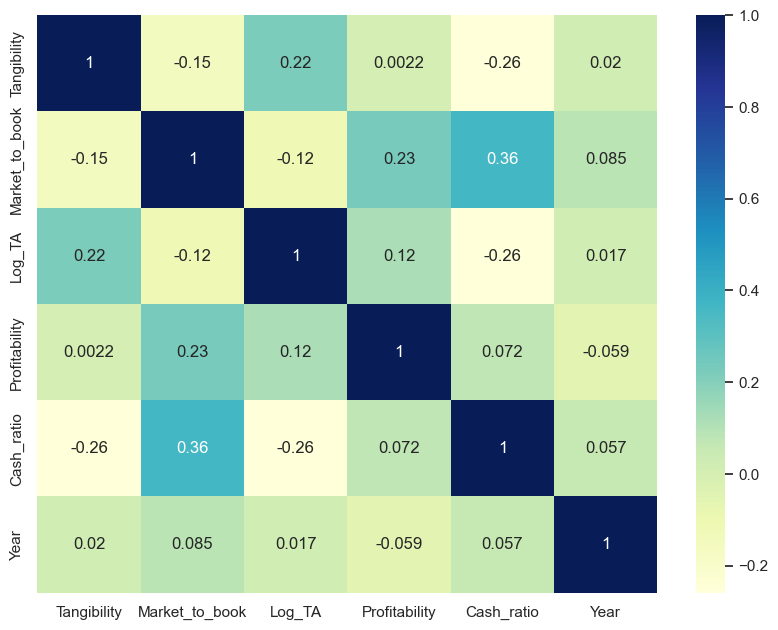

In [64]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix,annot=True,cmap="YlGnBu")
plt.show()

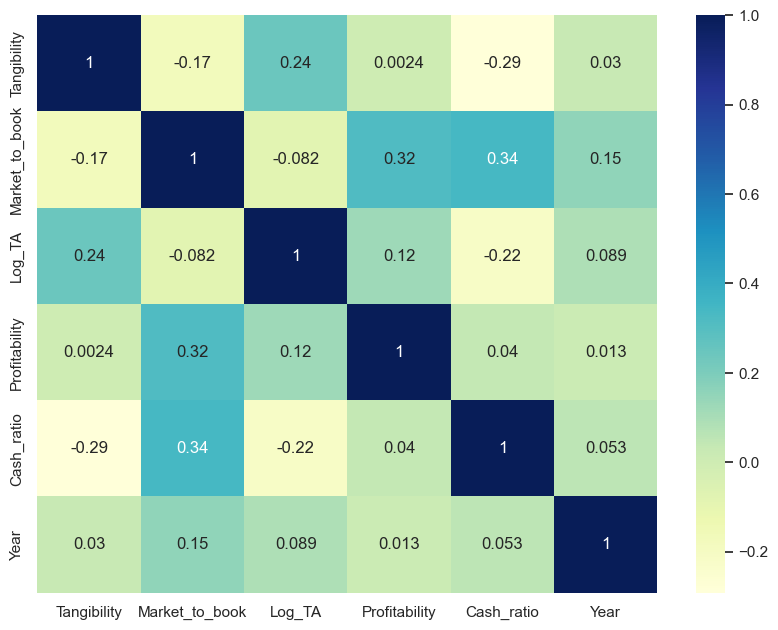

In [126]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix_uk,annot=True,cmap="YlGnBu")
plt.show()

## Kernet Density and Histogram Analysis

## Compare the distribution of cash ratio in 2007 and 2020 using distplot()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


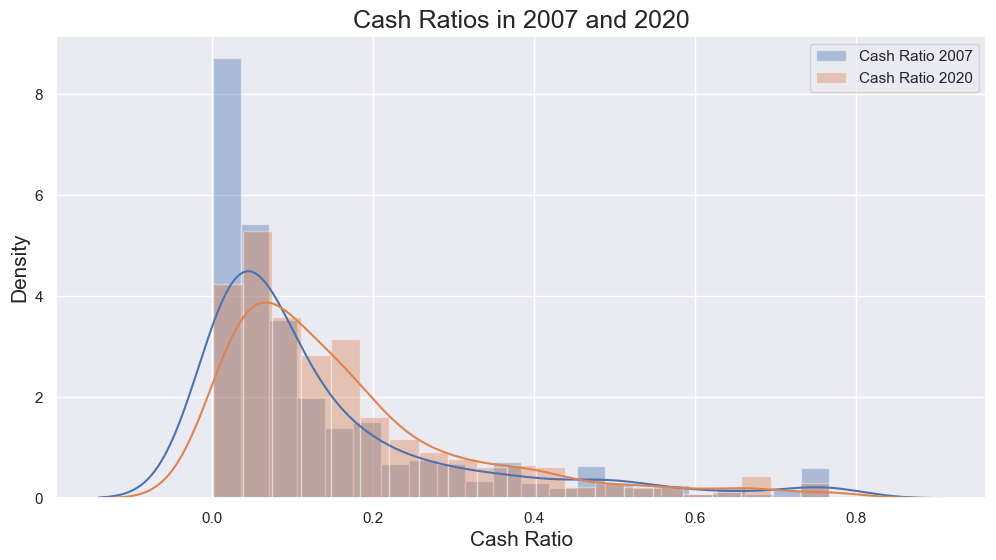

In [128]:
# Select the observations for 2007 and 2020
df_au_2007 = df_au1[df_au1['Year'] == 2007]
df_au_2020 = df_au1[df_au1['Year'] == 2020]

plt.figure(figsize=(12,6))
plt.xlabel('Cash Ratio', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title("Cash Ratios in 2007 and 2020",fontsize=18)

sns.distplot(df_au_2007["Cash_ratio"].values, label="Cash Ratio 2007");
sns.distplot(df_au_2020["Cash_ratio"].values, label="Cash Ratio 2020");
plt.legend()
plt.show()

### Interpretations:
*  The figure above shows that the incidence of the lowest cash holding group has decreased substantially in 2020, comapred with 2007.
*  On the other hand, for the other groups, cash holding are higher in 2020 than 2007.
*  So companies are now less likely to hold very low level of debt and more likely to hold higher levels of cash.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


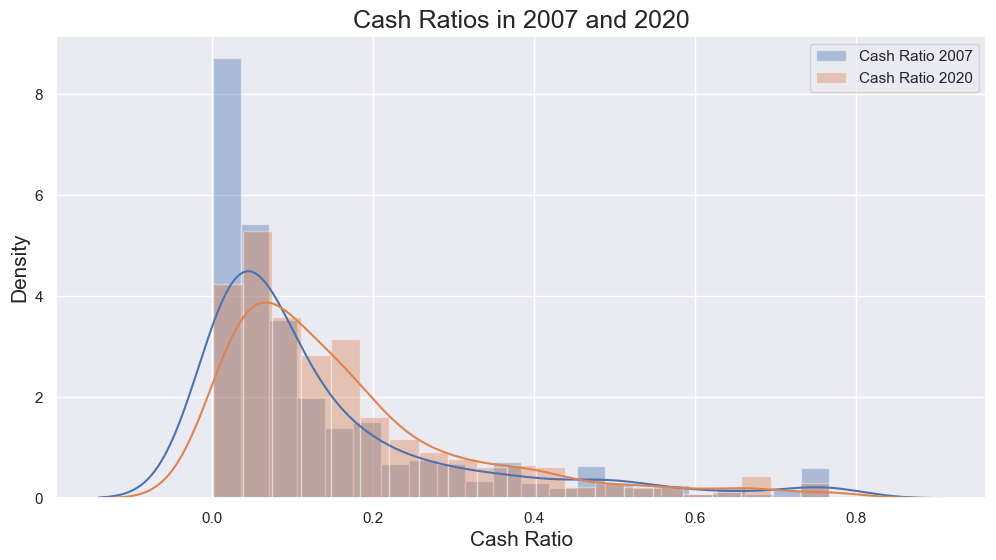

In [127]:
# Select the observations for 2007 and 2020
df_uk_2007 = df_uk1[df_uk1['Year'] == 2007]
df_uk_2020 = df_uk1[df_uk1['Year'] == 2020]

plt.figure(figsize=(12,6))
plt.xlabel('Cash Ratio', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title("Cash Ratios in 2007 and 2020",fontsize=18)

sns.distplot(df_au_2007["Cash_ratio"].values, label="Cash Ratio 2007");
sns.distplot(df_au_2020["Cash_ratio"].values, label="Cash Ratio 2020");
plt.legend()
plt.show()

## Regression Analysis

### We use the ordinary least squares or ols method from the statsmodels to look at the relation between firm characteristics 
such as asset tangibility (Tangibility), market to book ratio (Market_to_book) and Cash to asset ratio.

$Cash\_ratio = a + b\ Tangibility + c\ Market_to_book + d\ Log_TA + e\ Profitability$

where: 
Cash_ratio is the dependent variable that we are trying to explain
Tangibility, Market_to_book, Log_TA and Profitability are the explanatory variables or independent variables
and 'a' is the Intercept of the model and 'b','c','d' and 'e' are the coefficients.

The coefiicients tell us about the relation between the independent variables and the dependent variable (Cash_ratio)
For example, coefficient 'b' on Tangibility says that one unit increase in Tangibility ratio increases Cash_ratio by 'b'.

### Now Let's estimate this regression on our data for Australia

In [130]:
import statsmodels.formula.api as sm

result_aus = sm.ols(formula="Cash_ratio ~ Tangibility + Market_to_book + Log_TA + Profitability", data=df_au1).fit()
print(result_aus.params)

Intercept         0.202
Tangibility      -0.099
Market_to_book    0.036
Log_TA           -0.016
Profitability     0.019
dtype: float64


In [131]:
result_uk = sm.ols(formula="Cash_ratio ~ Tangibility + Market_to_book + Log_TA + Profitability", data=df_uk1).fit()
print(result_uk.params)

Intercept         0.174
Tangibility      -0.116
Market_to_book    0.037
Log_TA           -0.011
Profitability    -0.040
dtype: float64


#### The output above shows the estimated coefficients of the model given above. So we have:
    
a = 0.197
b = -0.094
c = 0.035
d = -0.016
e = 0.026

Thus if Tangibility ratio increases by 50% or 0.5, then Cash ratio is predicted to decrease by 0.5*(-0.094) = -0.047 or 4.7%

### We can get the full results as follows:

In [132]:
print(result_aus.summary())

                            OLS Regression Results                            
Dep. Variable:             Cash_ratio   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     670.4
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:36:30   Log-Likelihood:                 5466.7
No. Observations:               10278   AIC:                        -1.092e+04
Df Residuals:                   10273   BIC:                        -1.089e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2019      0.005     39.

Here we get the coefficients under the coef column, which are the same as before.
But we also get the statistical significance, or the P-values, of the coefficients under th P>|t| column.

In this case the P-values are all less than 0.01, so all the variables have a significat relation with Cash_ratio at the 1% level, which means the relations are highly significant.

In [133]:
print(result_uk.summary())

                            OLS Regression Results                            
Dep. Variable:             Cash_ratio   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     868.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:36:47   Log-Likelihood:                 8411.7
No. Observations:               14568   AIC:                        -1.681e+04
Df Residuals:                   14563   BIC:                        -1.678e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1741      0.004     43.

## Correlation Analysis

### Now Let's estimate the correlation coefficients and the p-values for the Australia sample

We use the stats.pearsonr() function to calculate the correlation matrix for our variables of interest.

In [134]:
from scipy import stats

df_corr = pd.DataFrame()
df_corr_p = pd.DataFrame()

for x in df_au1.columns:
    for y in df_au1.columns:
        corr_result = stats.pearsonr(df_au1[x], df_au1[y])
        df_corr.loc[x,y] = corr_result[0]
        df_corr_p.loc[x,y] = corr_result[1]

In [135]:
# Display the correlation coefficients
df_corr

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
Tangibility,1.000,-0.152,0.221,0.002,-0.259,0.020
Market_to_book,-0.152,1.000,-0.115,0.230,0.365,0.085
Log_TA,0.221,-0.115,1.000,0.116,-0.256,0.017
Profitability,0.002,0.230,0.116,1.000,0.072,-0.059
Cash_ratio,-0.259,0.365,-0.256,0.072,1.000,0.057
Year,0.020,0.085,0.017,-0.059,0.057,1.000


In [136]:
# Display the correlation p-values
df_corr_p

,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio,Year
Tangibility,0.000,0.000,0.000,0.824,0.000,0.041
Market_to_book,0.000,0.000,0.000,0.000,0.000,0.000
Log_TA,0.000,0.000,0.000,0.000,0.000,0.081
Profitability,0.824,0.000,0.000,0.000,0.000,0.000
Cash_ratio,0.000,0.000,0.000,0.000,0.000,0.000
Year,0.041,0.000,0.081,0.000,0.000,0.000


## Compare cash ratio across countries over the years

In [137]:
df41=df3.groupby(['COUNTRY', 'Year']).mean()

df_flat1 = df41.reset_index()

df_flat1.head()

,COUNTRY,Year,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio
0,Australia,2007,0.283,2.208,5.333,0.133,0.147
1,Australia,2008,0.276,1.558,5.392,0.073,0.135
2,Australia,2009,0.295,1.314,5.351,0.057,0.129
3,Australia,2010,0.273,1.414,5.394,0.091,0.143
4,Australia,2011,0.266,1.458,5.531,0.079,0.155


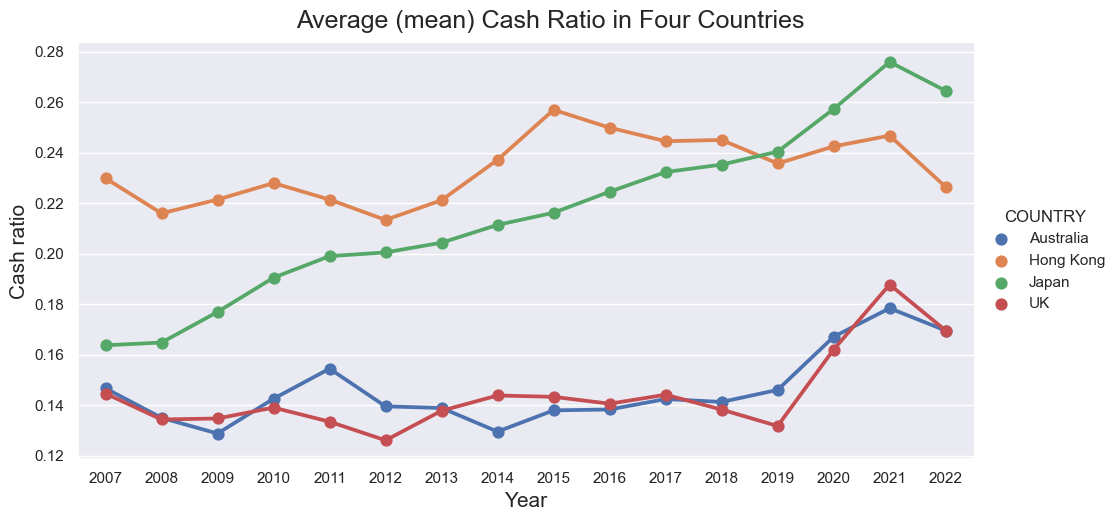

In [138]:
ax = sns.catplot(x="Year", y="Cash_ratio", hue="COUNTRY", kind="point", data=df_flat1, height=5, # make the plot 5 units high
    aspect=2); # height should be three times width

ax.fig.suptitle('Average (mean) Cash Ratio in Four Countries',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Cash ratio', fontsize=15);

In [139]:
plt.figure(figsize=(20,10))
df42=df3.groupby(['COUNTRY', 'Year']).median()

df_flat2 = df42.reset_index()
df_flat2.head()

,COUNTRY,Year,Tangibility,Market_to_book,Log_TA,Profitability,Cash_ratio
0,Australia,2007,0.194,1.496,5.075,0.125,0.074
1,Australia,2008,0.178,1.120,5.150,0.105,0.067
2,Australia,2009,0.206,0.999,5.090,0.094,0.067
3,Australia,2010,0.169,1.097,5.160,0.098,0.075
4,Australia,2011,0.156,1.053,5.299,0.092,0.088


<Figure size 2000x1000 with 0 Axes>

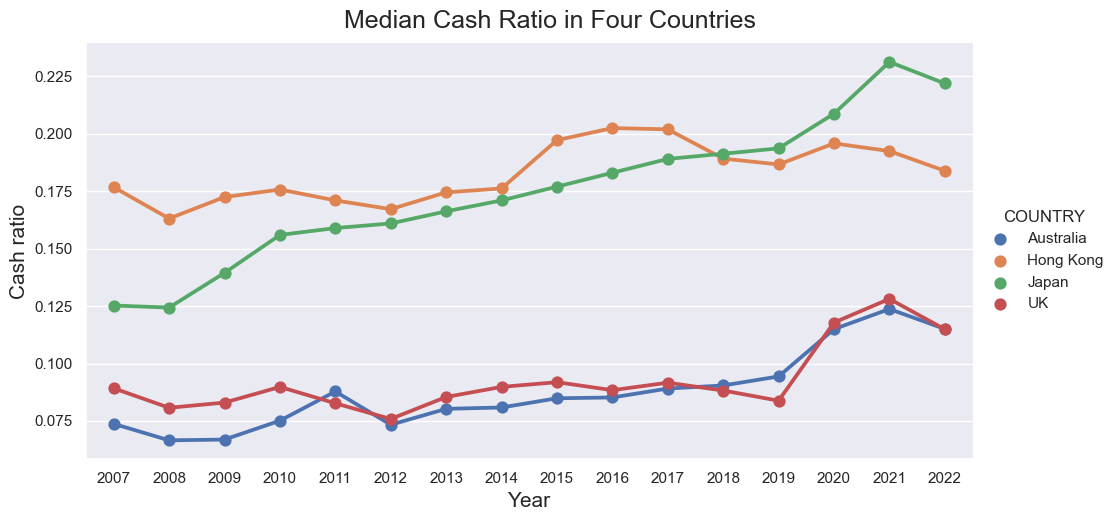

In [140]:
ax = sns.catplot(x="Year", y="Cash_ratio", hue="COUNTRY", kind="point", data=df_flat2, height=5, # make the plot 5 units high
    aspect=2); # height should be three times width);

ax.fig.suptitle('Median Cash Ratio in Four Countries',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Cash ratio', fontsize=15);